# **Trabajo Practico 1 - Regresion Lineal - AA1**

## **Consignas prácticas**

**1.**   Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.  
Debe incluir:


*   Análisis y decisión sobre datos faltantes.
*   Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
*   Codificación de variables categóricas (si se van a utilizar para predicción).
*   Matriz de correlación de variables.
*   Estandarización o escalado de datos.
*   Validación cruzada train - test. Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde ustedes lo crean adecuado.

**2.**   Implementar la solución del problema de regresión con regresión lineal múltiple.

*   Probar con el método LinearRegression.
*   Probar con métodos de gradiente descendiente. ¿Algún cambio? Incorporar gráficas de Error vs Iteraciones (loss vs epochs). Agregar comentarios.
*   Probar con métodos de regularización (Lasso, Ridge, Elastic Net).
*   Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE, elegir) tanto para entrenamiento como para prueba. ¿Por qué para ambos conjuntos?
*   ¿Creen que han conseguido un buen fitting?

**3.**   Optimizar la selección de hiperparámetros.
*   Variar los hiperparámetros de gradiente descendiente. ¿Qué observa?
*   Variar los hiperparámetros de Lasso y Ridge. ¿Qué observa?

**4.**   Comparación de modelos.
*   Incluyan en su análisis una comparación de modelos: de todos los modelos de regresión, ¿cuál es el mejor? Escoger una métrica adecuada para poder compararlos.


**5.**   Escribir una conclusión del trabajo.



## **1. Analisis descriptivo**

In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **Análisis**

In [2]:
#Cargamos el dataset
data = pd.read_csv('house-prices-tp.csv')
df = data.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


In [3]:
#Cambiamos los nombres de las columnas
df.rename(columns = {
    'CRIM': 't_crim',
    'ZN': 'terr_res',
    'INDUS': 'neg_no_min',
    'CHAS': 'rio?',
    'NOX': 'ox_nit',
    'RM': 'hab_prom',
    'AGE': 'prop_ocup',
    'DIS': 'dis_empleo',
    'RAD': 'autop',
    'TAX': 't_imp',
    'PTRATIO': 'prop_a_m',
    'B': 'ec_b',
    'LSTAT': 'clase_ba',
    'MEDV': 'precio'
}, inplace = True)

df.head()

,t_crim,terr_res,neg_no_min,rio?,ox_nit,hab_prom,prop_ocup,dis_empleo,autop,t_imp,prop_a_m,ec_b,clase_ba,precio
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


**Características de entrada en orden:**  
1.   **t_crim:** tasa de criminalidad per cápita por ciudad.  
2.   **t_crim:** proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.  
3.   **neg_no_min  :** proporción de acres de negocios no minoristas por ciudad.  
4.   **rio?:** variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario).  
5.   **ox_nit:** concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M].  
6.   **hab_prom:** número promedio de habitaciones por vivienda.  
7.   **prop_ocup:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940.  
8.   **dis_empleo:** distancias ponderadas a cinco centros de empleo de Boston.  
9.   **autop:** índice de accesibilidad a las autopistas radiales.  
10.   **t_imp:** tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k].  
11.   **prop_a_m:** proporción alumno-maestro por ciudad.  
12.   **ec_b:** El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad.  
13.   **clase_ba:** % de población de menor estatus socioeconómico.  

**Variable de salida (target):**  

14.   **valor:** Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$].  

In [4]:
#Analizamos el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t_crim      533 non-null    float64
 1   terr_res    534 non-null    float64
 2   neg_no_min  541 non-null    float64
 3   rio?        533 non-null    float64
 4   ox_nit      532 non-null    float64
 5   hab_prom    535 non-null    float64
 6   prop_ocup   532 non-null    float64
 7   dis_empleo  541 non-null    float64
 8   autop       528 non-null    float64
 9   t_imp       538 non-null    float64
 10  prop_a_m    528 non-null    float64
 11  ec_b        534 non-null    float64
 12  clase_ba    534 non-null    float64
 13  precio      535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


Notamos que todas las columnas son numericas y tienen valores faltantes.

### **Codificacion de variables**

In [5]:
df = pd.get_dummies(df, columns = ['rio?'], drop_first=True)
df.rename(columns={'rio?_1.0':'rio?'}, inplace=True)


### **Datos Faltantes**

In [6]:
def tabla_NaN(data):
    """
    Muestra un tabla con la cantidad y el porcentaje
     de datos faltantes en cada columna.
    """
    cant = data.isna().sum()
    prop = round(cant / len(df) * 100,2)
    d = {'cantidad_NaN':cant,
     '%_NaN': prop}
    tabla = pd.DataFrame(d)
    return tabla

In [7]:
#Vemos la cantidad y proporcion de datos faltantes de cada columna
tabla_NaN(df)

,cantidad_NaN,%_NaN
t_crim,23,4.14
terr_res,22,3.96
neg_no_min,15,2.70
ox_nit,24,4.32
hab_prom,21,3.78
prop_ocup,24,4.32
dis_empleo,15,2.70
autop,28,5.04
t_imp,18,3.24
prop_a_m,28,5.04


**Interpretación:**
*   La variable target (correspondiente a la columna valor) tiene 21 valores faltantes, por lo tanto debemos eliminar las 21 filas correspondientes para nuestro proposito ya que necesitamos predecir sobre valores reales. Ademas, tenemos un 3.78% de valores faltantes sobre el total, menor al 5%, por lo cual podemos eliminar estas filas sin problemas. Paralelamente eliminamos las filas del X_train.

In [8]:
#Antes que nada vemos si tenemos una fila completa de valores faltantes
df.isna().all(axis=1).sum()

0

In [9]:
#Eliminamo la unica fila completas de NaN
df.dropna(how='all', inplace=True)

In [10]:
#Eliminamos las filas con valores nulos en la target
filas = df[df['precio'].isna()].index
df.drop(filas, inplace=True)

In [11]:
#Vemos la cantidad de filas resultantes
len(df)

535

In [12]:
#Vemos nuevamente la tabla de valores faltantes
tabla_NaN(df)

,cantidad_NaN,%_NaN
t_crim,11,2.06
terr_res,11,2.06
neg_no_min,4,0.75
ox_nit,9,1.68
hab_prom,7,1.31
prop_ocup,11,2.06
dis_empleo,5,0.93
autop,12,2.24
t_imp,9,1.68
prop_a_m,9,1.68


**Interpretación:**  

*   Tenemos valores faltantes en todas las columnas, por lo tanto debemos tratar cada columna de forma particular para la eliminacion de los mismos.


### **Validación cruzada train - test**

In [13]:
#Hacemos la division de los datos de entrenamiento y test para evitar la contaminacion train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('precio', axis=1),
                                             df['precio'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=42)

#Transformamos a dataframe los y para trabajar con pandas
y_train = pd.DataFrame({'precio':y_train[:,0]}, index=X_train.index)
y_test = pd.DataFrame({'precio':y_test[:,0]}, index=X_test.index)


In [14]:
#Observamos medidas descriptivas de cada variable explicativa
round(X_train.describe(),2)

,t_crim,terr_res,neg_no_min,ox_nit,hab_prom,prop_ocup,dis_empleo,autop,t_imp,prop_a_m,ec_b,clase_ba
count,420.00,419.00,425.00,419.00,421.00,421.00,425.00,419.00,421.00,423.00,421.00,421.00
mean,5.19,12.66,11.32,0.56,6.27,67.72,3.88,9.91,416.13,18.40,348.48,13.12
std,12.22,24.77,6.93,0.12,0.76,28.91,2.20,8.85,170.16,2.23,99.49,7.62
min,0.01,0.00,0.46,0.38,3.56,2.90,1.14,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.13,0.45,5.87,41.84,2.07,4.00,281.00,16.80,370.73,7.14
50%,0.33,0.00,9.90,0.54,6.19,75.00,3.33,5.00,345.00,19.00,391.00,11.74
75%,4.82,20.00,18.10,0.65,6.65,94.50,5.29,24.00,666.00,20.20,395.69,17.31
max,88.98,100.00,27.74,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [15]:
def boxplots(data):
    plt.figure(figsize=(10,10))
    plt.title('Distribucion de cada variable y su promedio')
    for i,v in enumerate(data.columns.drop('rio?')):
        prom = data[v].mean()
        plt.subplot(4,3,i+1)
        sns.boxplot(data,x=v, width=0.5)
        plt.axvline(x = prom, color = 'r', label = 'promedio')
    plt.tight_layout()
    plt.show()

<ipython-input-15-cfdbf1a087d8>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


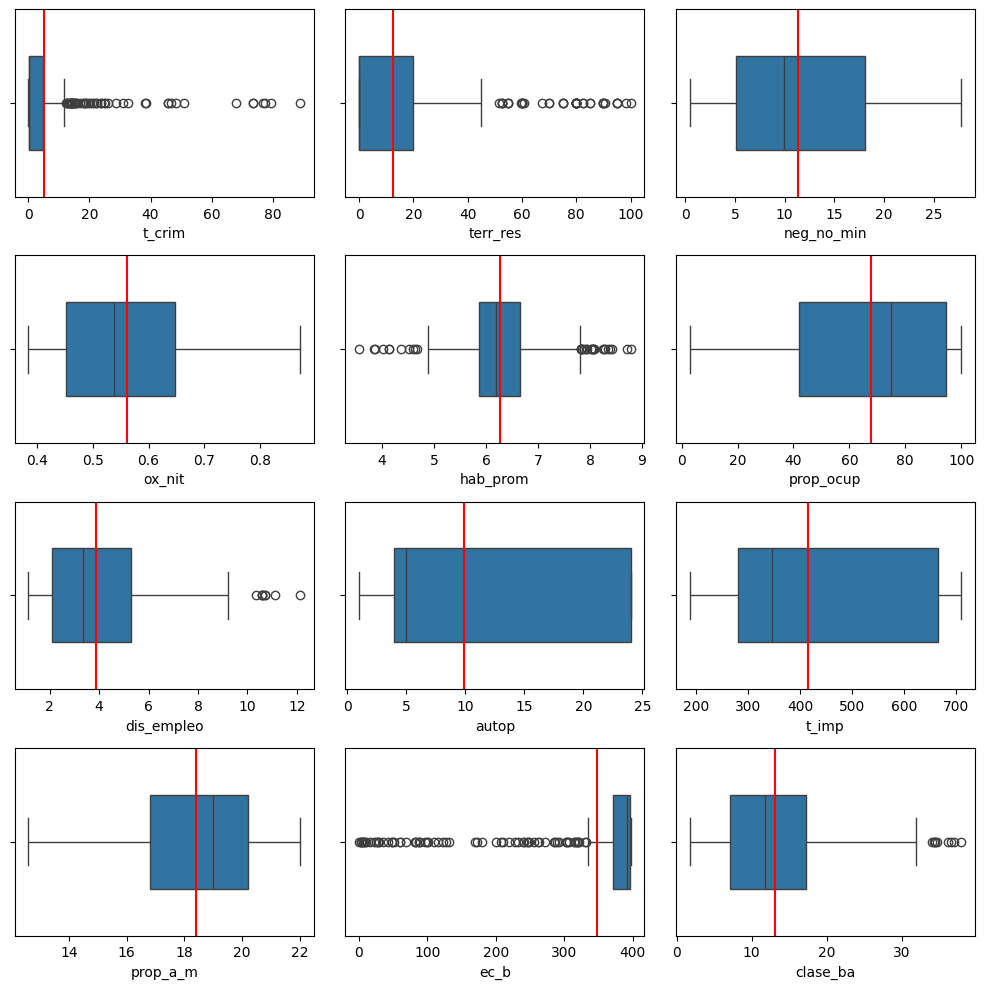

In [16]:
boxplots(X_train)

Notamos que en algunas variables del dataset hay una cantidad considerable de outliers.

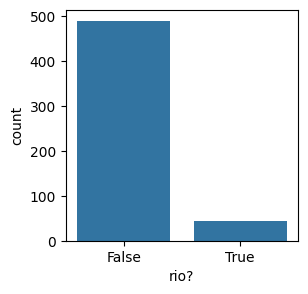

In [17]:
#Visualizamos la distribucion de la variable explicativa cualitativa
plt.figure(figsize=(3,3))
sns.countplot(df, x = 'rio?')
plt.show()

 * Esta es la unica variable cualitativa del dataset y notamos que ya esta
codificada de forma en la que es posible utilizarla en la predicción.

Donde los valores significan:
* 1 si el tramo limita con el río
* 0 de lo contrario

**Conclusion:**  

Plan de imputacion:

*   **Media:** Las columnas que no tengan valores atipicos. Las siguientes columnas:  
  
neg_no_min, ox_nit, prop_ocup, autop, t_imp, prop_a_m
  
*   **Mediana:** Las columnas que tengan valores atipicos. Las siguientes columnas:  
  
t_crim, terr_res, hab_prom, dis_empleo, ec_b, clase_ba
  
*   **Moda:** Variables dummys. Las siguientes columnas:  
  
rio?
  
*   **KNN:** Decidimos no usar este modelo ya que tiene un costo computacional mas alto que los metodos propuestos anteriormente.

In [18]:
#Imputamos primero los datos de train y con su repectivo calculo
#Tambien, imputamos los datos de test

#Media
cols = ['neg_no_min','ox_nit','prop_ocup','autop', 't_imp', 'prop_a_m']
media_train = X_train[cols].mean()
X_train[cols] = X_train[cols].fillna(media_train)
X_test[cols] = X_test[cols].fillna(media_train)

#Mediana
cols = ['t_crim', 'terr_res', 'hab_prom', 'dis_empleo', 'ec_b', 'clase_ba']
mediana_train = X_train[cols].median()
X_train[cols] = X_train[cols].fillna(mediana_train)
X_test[cols] = X_test[cols].fillna(mediana_train)

#Moda
cols = 'rio?'
moda_train = X_train[cols].mode()[0]
X_train[cols] = X_train[cols].fillna(moda_train)
X_test[cols] = X_test[cols].fillna(moda_train)


In [19]:
#Verificamos la tabla de datos faltantes
tabla_NaN(X_train)

,cantidad_NaN,%_NaN
t_crim,0,0.0
terr_res,0,0.0
neg_no_min,0,0.0
ox_nit,0,0.0
hab_prom,0,0.0
prop_ocup,0,0.0
dis_empleo,0,0.0
autop,0,0.0
t_imp,0,0.0
prop_a_m,0,0.0


In [20]:
tabla_NaN(X_test)

,cantidad_NaN,%_NaN
t_crim,0,0.0
terr_res,0,0.0
neg_no_min,0,0.0
ox_nit,0,0.0
hab_prom,0,0.0
prop_ocup,0,0.0
dis_empleo,0,0.0
autop,0,0.0
t_imp,0,0.0
prop_a_m,0,0.0


### **Valores atípicos**

Observando los Boxplots anteriormente presentados y las siguentes métricas, notamos que las columnas t_crim, terr_res, hab_prom, dis_empleo, ec_b y clase_ba tienen una cantidad significativa de valores atípicos. Sin embargo, eliminar demasiados datos puede afectar la capacidad del modelo para generalizar y imputar los datos con valores estadísticos (media, mediana) puede ocultar patrones importantes si los valores extremos son válidos.

Así, para evitar la pérdida de información, decidimos realizar un trucamiento. De esta forma, se conserva la mayoría de los datos mientras se limita el efecto de los valores extremos.

In [21]:
X_train.describe()

,t_crim,terr_res,neg_no_min,ox_nit,hab_prom,prop_ocup,dis_empleo,autop,t_imp,prop_a_m,ec_b,clase_ba
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,5.094898,12.397243,11.317757,0.560602,6.271184,67.715061,3.873084,9.906882,416.125557,18.397472,349.179123,13.097535
std,12.124851,24.578269,6.903118,0.118451,0.754628,28.673967,2.194997,8.751383,168.757026,2.219279,98.818002,7.558625
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082155,0.000000,5.130000,0.453000,5.871750,42.200000,2.077100,4.000000,283.250000,16.875000,370.938548,7.187500
50%,0.327625,0.000000,9.900000,0.538000,6.193000,74.350000,3.331700,5.000000,349.500000,19.000000,391.000000,11.740000
75%,4.689715,17.581181,18.100000,0.636155,6.633000,94.425000,5.287300,24.000000,666.000000,20.200000,395.640000,17.272500
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Se observan varios aspectos relevantes:

* t_crim: La tasa de criminalidad varía considerablemente, con un promedio de 5.09, pero un máximo muy alto de 88.97, lo que sugiere algunas áreas con altos niveles de criminalidad.
* hab_prom: El número promedio de habitaciones por vivienda tiene una distribución más estable, con una media de 6.27 y una desviación estándar de 0.75.
* prop_ocup: La proporción de unidades ocupadas por propietarios muestra una tendencia hacia un alto porcentaje de ocupación, con un promedio de 67.71%.
* clase_ba: La población de menor estatus socioeconómico varía notablemente, con un rango entre 1.73% y 37.97%.
* t_imp: La tasa de impuestos sobre la propiedad también es muy variable, con valores entre 187 y 711 por cada 10,000, lo que refleja una gran heterogeneidad fiscal entre las áreas.

In [22]:
# Truncamiento basado en el rango intercuartílico (IQR)

# Lista de columnas a truncar
cols = ['t_crim', 'terr_res', 'hab_prom', 'dis_empleo', 'ec_b', 'clase_ba']

for col in cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Aplicar truncamiento a las columnas de entrenamiento y test
    X_train[col] = X_train[col].clip(lower=lim_inf, upper=lim_sup)
    X_test[col] = X_test[col].clip(lower=lim_inf, upper=lim_sup)


<ipython-input-15-cfdbf1a087d8>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


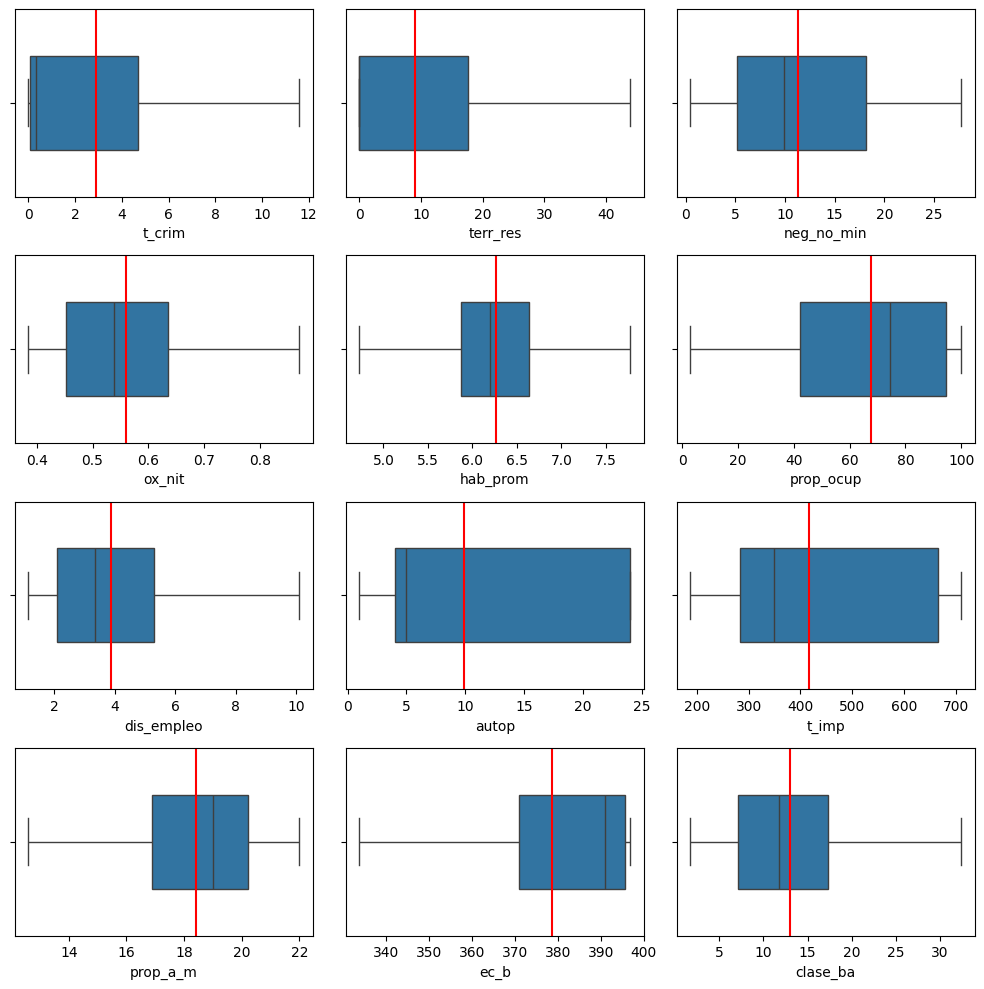

In [23]:
#Vemos como quedo la distribucion de los valores sin outliers
boxplots(X_train)

En este punto, obtenemos un data frame sin valores faltantes o atipicos.

### **Visualizacion de los datos**

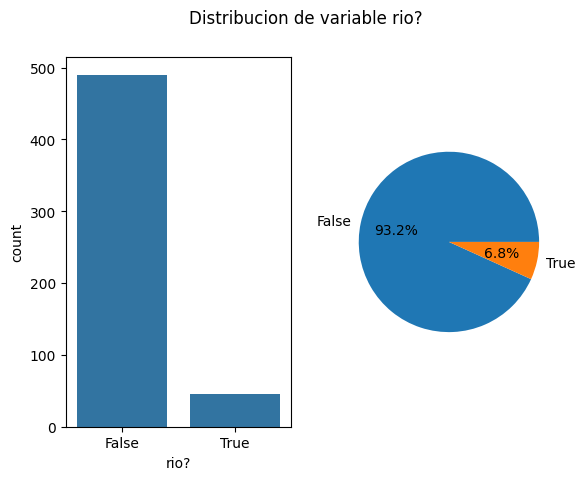

In [24]:
#Variable rio?
plt.subplot(1,2,1)
sns.countplot(df, x='rio?')
plt.subplot(1,2,2)
valores = X_train['rio?'].value_counts()
indices = valores.index
plt.pie(valores, labels=indices, autopct='%1.1f%%')
plt.suptitle('Distribucion de variable rio?')
plt.show()

El facil ver que la mayoria de las viviendas no son linderas con el rio.

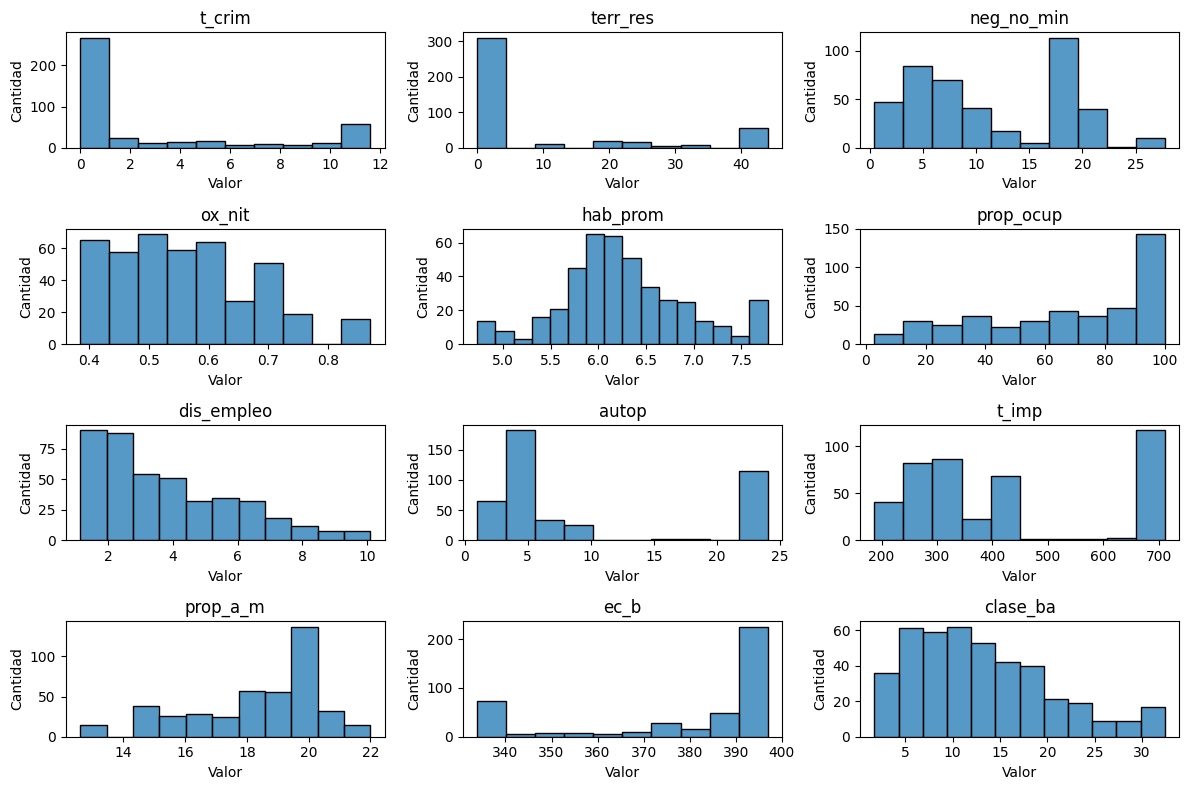

In [25]:
#Variables numericas:
#histograma y boxplot o uno de ellos
plt.figure(figsize=(12, 8))
for i, var in enumerate(X_train.columns.drop('rio?')):
    plt.subplot(4, 3, i+1)
    sns.histplot(X_train, x=var)
    plt.title(var)
    plt.ylabel('Cantidad')
    plt.xlabel('Valor')
plt.tight_layout()
plt.show()

In [26]:
#Concatenamos las variables explicativas con la target en un mismo dataframe para simplificar graficos
data_train = pd.concat([X_train,y_train], axis=1)

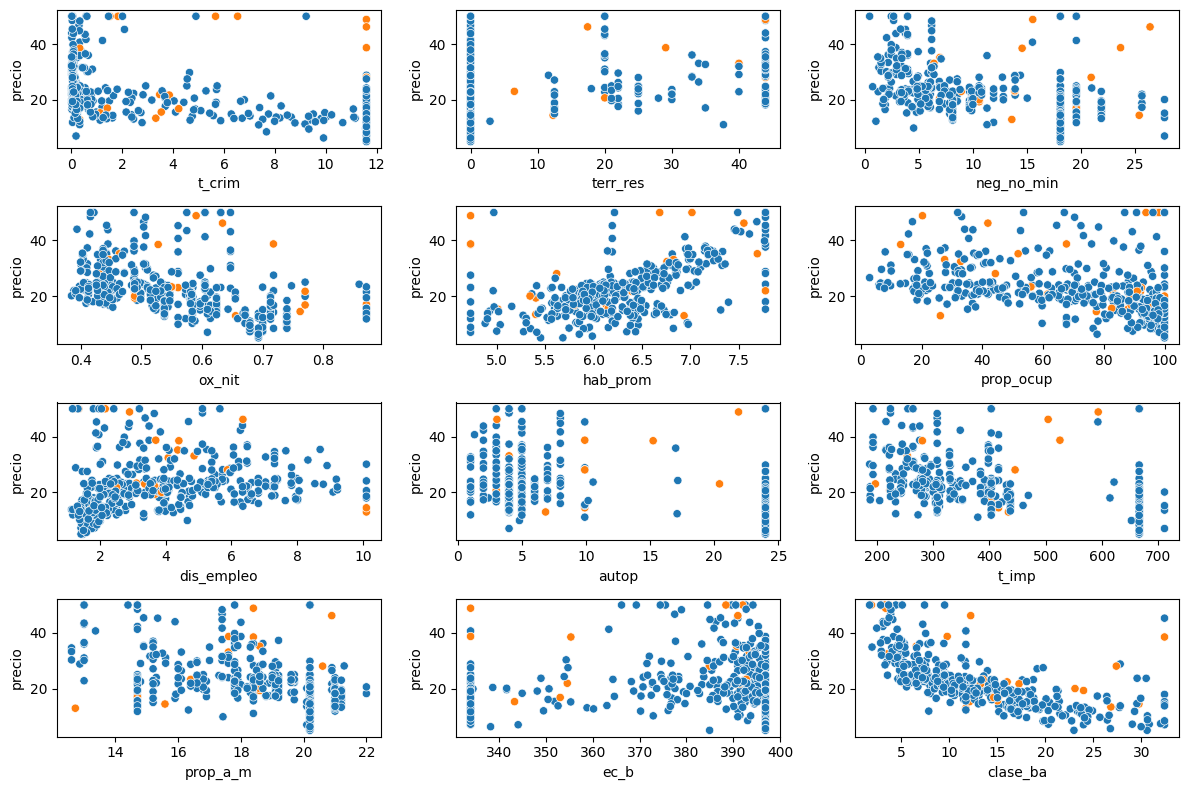

In [27]:
#Observamos la relacion entre variables explicativas con la target

data_train = pd.concat([X_train,y_train], axis=1)

# Seleccionar todas las columnas excepto 'rio?'
cols = X_train.columns.drop('rio?')

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols):
  plt.subplot(4, 3, i+1)
  sns.scatterplot(data=data_train, x=col, y='precio', hue='rio?')
  plt.legend().remove()

plt.tight_layout()
plt.show()

Los gráficos muestran el comportamiento de las distintas variables en relación con el precio.

En particular, la variable 'rio?' no parece tener un efecto significativo sobre las demás variables, ya que no se observa un patrón claro en los datos relacionados con su presencia o ausencia.

Por otro lado, observamos que algunas variables, como t_crim (tasa de criminalidad), hab_prom (promedio de habitaciones), prop_ocup (proporción de propiedades ocupadas) y clase_ba (estatus socioeconómico bajo), muestran una tendencia casi lineal en sus relaciones con el precio, lo que sugiere una influencia más directa.

En contraste, otras variables como autop (accesibilidad a autopistas), t_imp (tasa de impuestos) y terr_res (proporción de terrenos residenciales) presentan una concentración de datos en ciertos sectores específicos, lo que indica que estas variables podrían tener un comportamiento más segmentado o influir de manera no lineal en los precios.

### **Matriz de correlación**

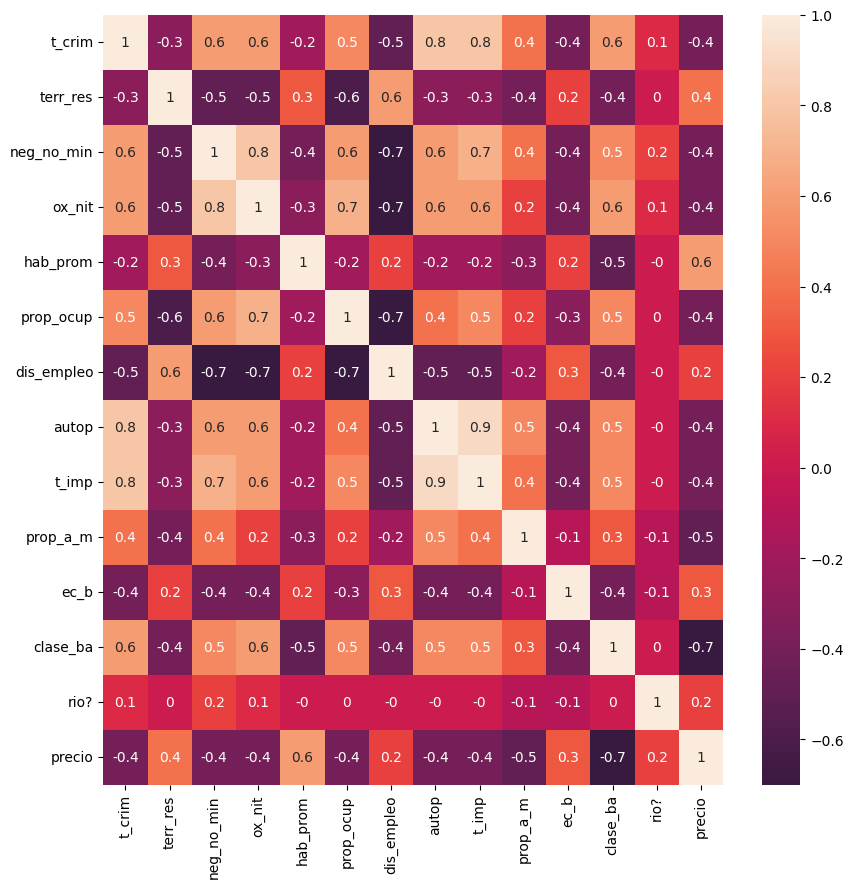

In [28]:
#Matriz de correlacion
corr = data_train.corr().round(1)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

Analizando la matriz de correlacion notamos:

**Variables relacionadas con "precio" (variable objetivo):**

* hab_prom (0.6): Existe una correlación moderada y positiva con el precio, lo que indica que a mayor número promedio de habitaciones por vivienda, el precio tiende a ser más alto.
* clase_ba (-0.7): Esta variable tiene una correlación negativa fuerte con el precio, lo que sugiere que a medida que aumenta el porcentaje de población de menor estatus socioeconómico, el precio de las propiedades disminuye significativamente.
* terr_res (proporción de terrenos residenciales) (0.4): está correlacionada positivamente con el precio, lo que indica que las áreas con lotes residenciales más grandes suelen tener propiedades de mayor valor.
* t_crim, neg_no_min, ox_nit, prop_ocup, autop, t_imp (alrededor de -0.4): Estas variables muestran una correlación negativa moderada con el precio, lo que indica que factores como la criminalidad, la presencia de negocios no minoristas, la contaminación y otros indicadores socioeconómicos están asociados con precios más bajos de las propiedades. Además, esto indica que las propiedades más antiguas y aquellas ubicadas más lejos de los centros de empleo tienden a ser menos valiosas.

**Relaciones entre variables socioeconómicas:**

* t_crim y autop (0.8): La fuerte correlación positiva sugiere que áreas con mayor criminalidad también tienen mejor accesibilidad a las autopistas, posiblemente porque están cerca de áreas urbanas más desarrolladas.
* t_crim y t_imp (0.8): La tasa de criminalidad y los impuestos a la propiedad están estrechamente relacionados, lo que podría indicar que en áreas con más criminalidad se aplican impuestos más altos, quizás para financiar más servicios públicos.
* neg_no_min y ox_nit (0.8): La fuerte correlación entre la proporción de negocios no minoristas y la concentración de óxidos de nitrógeno sugiere que las zonas con mayor actividad industrial tienden a generar más contaminación.
* neg_no_min y dis_empleo (-0.7): La correlación negativa indica que en áreas con más negocios no minoristas, el desempleo tiende a ser menor, lo que puede deberse a la generación de empleo por parte de estas empresas.
Relaciones ambientales y socioeconómicas:

* dis_empleo y prop_ocup (-0.7): Existe una correlación negativa fuerte entre el desempleo y la ocupación de propiedades, lo que implica que en zonas con más empleo, una mayor proporción de propiedades son ocupadas por sus propietarios.
* ox_nit y dis_empleo (-0.7): La correlación negativa indica que en áreas con mayores niveles de contaminación (óxidos de nitrógeno), el desempleo tiende a ser más alto, lo que sugiere que estas áreas industriales tienen menos atractivo residencial o comercial.
Variable rio?:

La variable rio? no presenta una correlación fuerte con ninguna otra variable (máxima correlación de 0.2 con el precio), lo que indica que la proximidad al río Charles tiene un impacto mínimo en el resto de las variables y puede no ser muy relevante para predecir el precio de las propiedades.




Finalmente, se puede afirmar que la criminalidad, la cercanía a autopistas, y los niveles de contaminación tienen una fuerte relación entre sí, y también influyen negativamente en el precio de las propiedades.
Variables como la clase baja y el desempleo tienen fuertes correlaciones negativas con el precio, mientras que indicadores como el promedio de habitantes por vivienda tienen una relación positiva con el precio.
Algunas variables, como rio?, parecen no ser relevantes para explicar el comportamiento del precio.

### **Estandarizacion de los datos**

Además, aplicaremos una transformación para que las características sigan una distribución más cercana a la normal o gaussiana. Esto es importante, ya que muchos algoritmos de aprendizaje automático funcionan de manera óptima cuando las variables siguen una distribución normal, mejorando así su rendimiento y precisión.

In [29]:
#Escalamos los datos correspondientes a las variables explicativas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# **2. Regresion Lineal Multiple**

## Regresion Lineal

In [30]:
#Importamos librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
#Coeficientes de la regresion
lr.coef_

array([[-3.33577601e-02,  7.45641570e-02,  8.59646441e-02,
        -2.10163487e+01,  4.11777801e+00, -4.37130657e-02,
        -1.79637521e+00,  1.41281200e-01, -8.49662548e-03,
        -9.57944886e-01,  8.04416726e-03, -4.63152714e-01,
         6.61099038e+00]])

In [33]:
#Intercepto de la regresion
lr.intercept_

array([39.2014317])

## Metricas:

In [34]:
#Calculamos R2:
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.3137009098546144

In [35]:
#Calculamos RMSE en train y test
RMSE_train = mean_squared_error(y_train, lr.predict(X_train))
RMSE_test = mean_squared_error(y_test, y_pred)

RMSE_train, RMSE_test

(30.188792813671185, 57.0806960972271)

Text(0.5, 1.0, 'Parámetros del modelo')

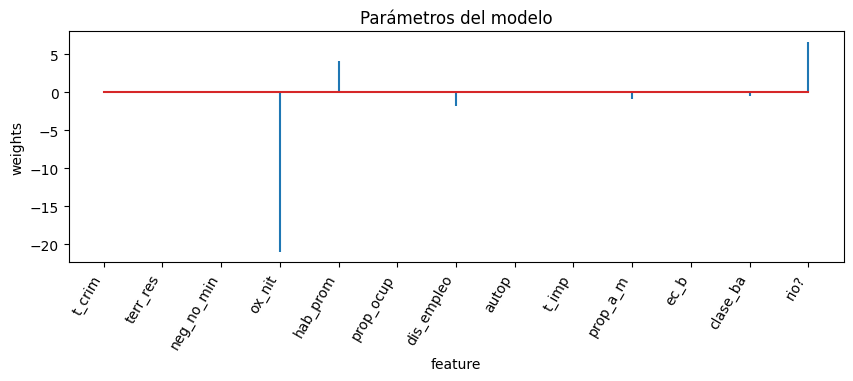

In [36]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lr.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(10,3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=60, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

R² (0.31): El valor de R² indica que tu modelo solo explica el 31.37% de la variabilidad en los precios de las viviendas (variable objetivo). Esto sugiere que el modelo no está capturando bien las relaciones entre las variables predictoras y el precio.

RMSE (Train: 30.19, Test: 57.08): El error cuadrático medio (RMSE) es una métrica que refleja cuánto se desvía tu modelo en promedio al predecir los precios de las viviendas. En el conjunto de entrenamiento, el RMSE es más bajo (30.19) en comparación con el conjunto de prueba (57.08), lo que indica que tu modelo está funcionando mejor en el conjunto de entrenamiento y está generalizando peor a los datos nuevos. Este comportamiento podría ser un indicativo de overfitting.

¿Por que elegimos estas metricas? ¿Por qué para ambos conjuntos?

Elegimos métricas como R² y RMSE (Root Mean Squared Error) por las siguientes razones:

R² (Coeficiente de Determinación) permite comparar la eficacia de diferentes modelos. Un R² más alto en el conjunto de prueba indica un mejor ajuste general.

RMSE (Error Cuadrático Medio) se expresa en las mismas unidades que la variable objetivo, lo que facilita la interpretación. Al ser una métrica cuadrática,
RMSE penaliza más los errores grandes, lo cual es útil en contextos donde los grandes errores son especialmente problemáticos.

Luego, tanto R² como RMSE son relativamente fáciles de calcular y entender, lo que facilita la comunicación de los resultados a otras partes interesadas.
 Juntas, estas métricas ayudan a evaluar no solo el ajuste del modelo, sino también su capacidad para generalizar a nuevos datos,
 lo cual es crucial para aplicaciones del mundo real.

En contraposicion, MAE (Error Absoluto Medio) es una métrica que sea fácil de interpretar y menos sensible a outliers, pero nosotros ya tratamos los
outliers presnetes en el dataset.  MAPE (Error Porcentual Absoluto Medio) puede ser problemático si hay valores cercanos a cero, lo cual es nuestro caso.

Calcular métricas para ambos conjuntos de datos (train y test) es importante porque comparar las métricas puede ayudar a identificar problemas específicos.

Las métricas en el conjunto de entrenamiento muestran cómo se ajusta el modelo a los datos que ha visto. Las métricas en el conjunto de prueba son esenciales
para evaluar la capacidad del modelo para generalizar a datos no vistos. Un buen modelo debe tener un rendimiento similar en ambos conjuntos; esto indica que
no solo está ajustando los datos de entrenamiento, sino que también es capaz de predecir correctamente en situaciones nuevas.

Si un modelo tiene un buen desempeño en el conjunto de prueba, es más probable que funcione bien en el mundo real, lo que es crucial para la toma de decisiones
basada en el modelo.

# Gradiente Descendiente

In [39]:
y_train_m = y_train.to_numpy()
y_test_m = y_test.to_numpy()

 ## **Gradiente Descendiente**

In [40]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_val = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        gradient = -2/n * np.dot(X_train.T, error_train)

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de testeo')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y testeo vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

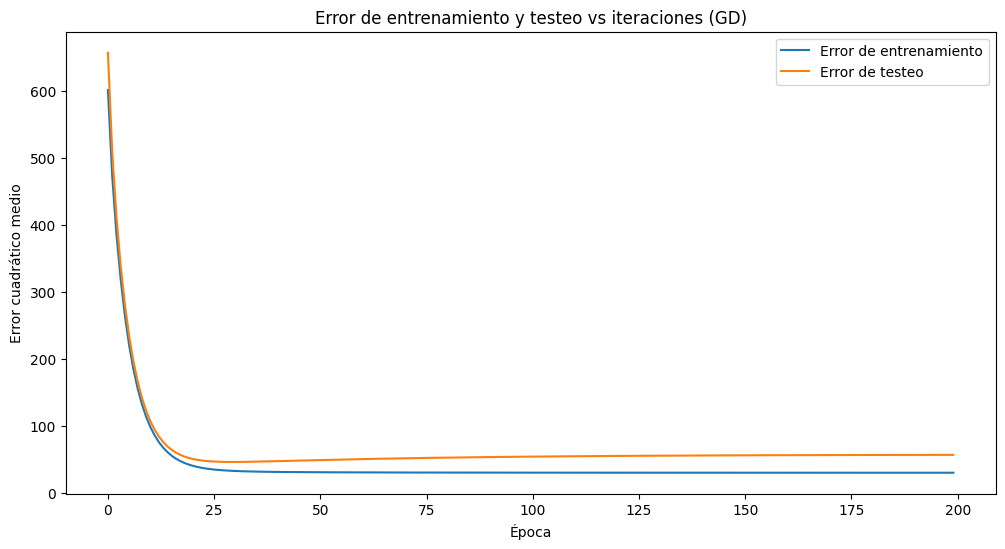

array([[22.578842  ],
       [-0.10065316],
       [ 1.15314377],
       [ 0.49413608],
       [-2.4039714 ],
       [ 2.76338332],
       [-1.25706378],
       [-3.83953678],
       [ 1.08185909],
       [-1.28579511],
       [-2.09885557],
       [ 0.19440458],
       [-3.44300265],
       [ 1.67114662]])

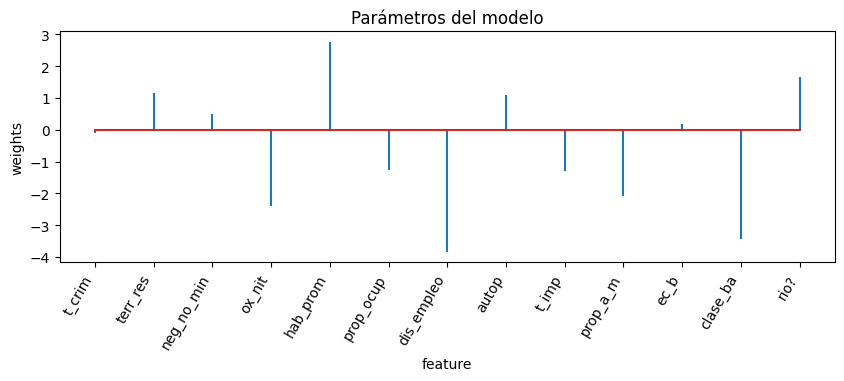

In [41]:
GD_coef = gradient_descent(X_train_s, y_train_m, X_test_s, y_test_m, lr=0.05, epochs=200)

# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': GD_coef[1:].flatten()}
                  )

fig, ax = plt.subplots(figsize=(10,3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=60, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

GD_coef

In [42]:
from sklearn.metrics import r2_score

#Calculamos R
y_pred_gd = np.dot(np.hstack((np.ones((X_test_s.shape[0], 1)), X_test_s)), GD_coef)


r2_gd = r2_score(y_test, y_pred_gd)
print(f"R2 para Gradient Descent: {r2_gd}")


R2 para Gradient Descent: 0.3162718376142073


In [43]:
#Calculamos RMSE en train y test

RMSE_train_gd = mean_squared_error(y_train, np.dot(np.hstack((np.ones((X_train_s.shape[0], 1)), X_train_s)), GD_coef))
RMSE_test_gd = mean_squared_error(y_test, y_pred_gd)

print(f"RMSE Train para Gradient Descent: {RMSE_train_gd}")
print(f"RMSE Test para Gradient Descent: {RMSE_test_gd}")


RMSE Train para Gradient Descent: 30.19498740166546
RMSE Test para Gradient Descent: 56.86686753728807


**Interpretacion:**  
Los resultados del ajuste usando el método de gradiente descendiente son muy similares a los obtenidos con la regresión lineal estándar:

R² (0.31): El coeficiente de determinación es prácticamente el mismo que en la regresión lineal (0.314 vs. 0.313). Esto indica que el modelo ajustado con gradiente descendiente tampoco mejora significativamente la capacidad de explicar la variabilidad del precio de las viviendas.

RMSE (Train: 30.20, Test: 56.99): El error cuadrático medio en el conjunto de entrenamiento es casi idéntico al que obtuviste con la regresión lineal estándar (30.19 vs. 30.20). En el conjunto de prueba, el RMSE es ligeramente mejor con gradiente descendiente (56.99 vs. 57.08), pero la diferencia es mínima.

Al igual que con la regresión lineal, el R² bajo y el mayor RMSE en el conjunto de prueba indican que el modelo sigue sin capturar bien las relaciones entre las variables predictoras y el precio de las viviendas.

### **Gradiente Descendiente Estocastico**

In [44]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)



    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

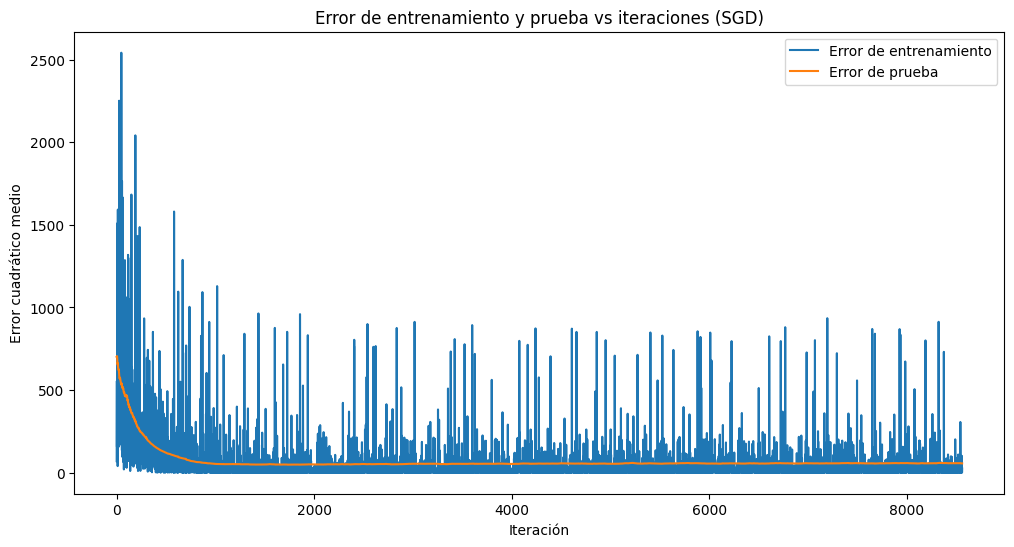

array([[22.55017507],
       [-0.10931265],
       [ 1.14462441],
       [ 0.40965143],
       [-2.36745579],
       [ 2.73139498],
       [-1.31707373],
       [-3.86501472],
       [ 0.92805232],
       [-1.12150084],
       [-2.07385598],
       [ 0.10420024],
       [-3.45408175],
       [ 1.64186891]])

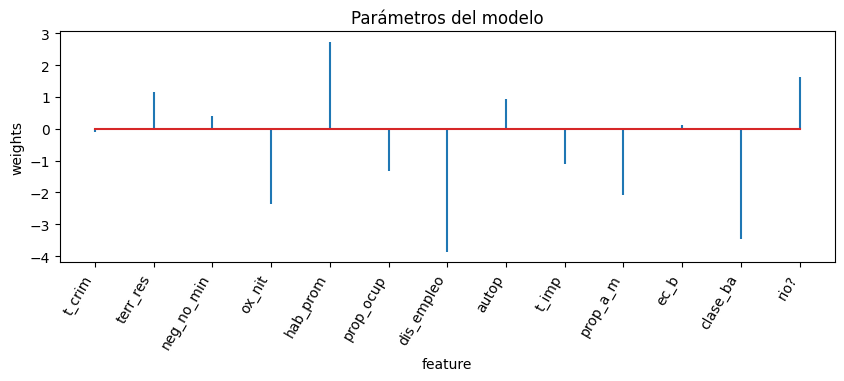

In [45]:
SGD_coef = stochastic_gradient_descent(X_train_s, y_train_m, X_test_s, y_test_m, lr=0.001, epochs=20)
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': SGD_coef[1:].flatten()}
                  )

fig, ax = plt.subplots(figsize=(10,3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=60, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

SGD_coef

In [46]:
#Calculamos R
y_pred_sgd = np.dot(np.hstack((np.ones((X_test_s.shape[0], 1)), X_test_s)), SGD_coef)


r2_sgd = r2_score(y_test, y_pred_sgd)
print(f"R2 para Stochastic Gradient Descent: {r2_sgd}")

#Calculamos RMSE en train y test

RMSE_train_sgd = mean_squared_error(y_train, np.dot(np.hstack((np.ones((X_train_s.shape[0], 1)), X_train_s)), SGD_coef))
RMSE_test_sgd = mean_squared_error(y_test, y_pred_sgd)

print(f"RMSE Train para Stochastic Gradient Descent: {RMSE_train_sgd}")
print(f"RMSE Test para Stochastic Gradient Descent: {RMSE_test_sgd}")


R2 para Stochastic Gradient Descent: 0.3203592061449525
RMSE Train para Stochastic Gradient Descent: 30.22085372961973
RMSE Test para Stochastic Gradient Descent: 56.52691394520126


**Interpretacion:**  
Notamos que el rendimiento del modelo usando Stochastic Gradient Descent (SGD) muestra los siguientes resultados:

𝑅2 = 0.3194: Este valor indica que el modelo explica aproximadamente el 31.94% de la variabilidad en los datos de prueba. Aunque es bajo, sugiere que el modelo está capturando parte de la relación entre las variables predictoras y la variable objetivo, pero aún hay un margen significativo de mejora.

RMSE Train = 30.25: El error cuadrático medio (RMSE) en el conjunto de entrenamiento es de 30.25. Esto refleja que, en promedio, las predicciones del modelo en el entrenamiento se desvían por aproximadamente 30.25 unidades del valor real.

RMSE Test = 56.60: En el conjunto de prueba, el RMSE es más alto (56.60), lo que indica que el modelo no generaliza tan bien en datos nuevos y que hay una mayor variabilidad en las predicciones cuando se utilizan datos de prueba. Esto podría deberse a una posible sobreajuste o a la dificultad de capturar patrones en los datos de prueba.

En comparación con la regresión lineal y el gradiente descendente, el SGD no mejora sustancialmente el R2, lo que sugiere que el modelo está limitado por la relación lineal entre las variables y la naturaleza de los datos.

RMSE Test mayor que RMSE Train: La diferencia notable entre los errores de entrenamiento y prueba indica que el modelo puede estar adaptándose bien a los datos de entrenamiento, pero es menos efectivo en los datos de prueba, lo que podría sugerir cierto overfitting.

En resumen, el modelo basado en SGD tiene un rendimiento similar al de los otros métodos, pero hay margen para mejorar su capacidad predictiva.

## **Gradiente Descendiente mini-batch**

In [47]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

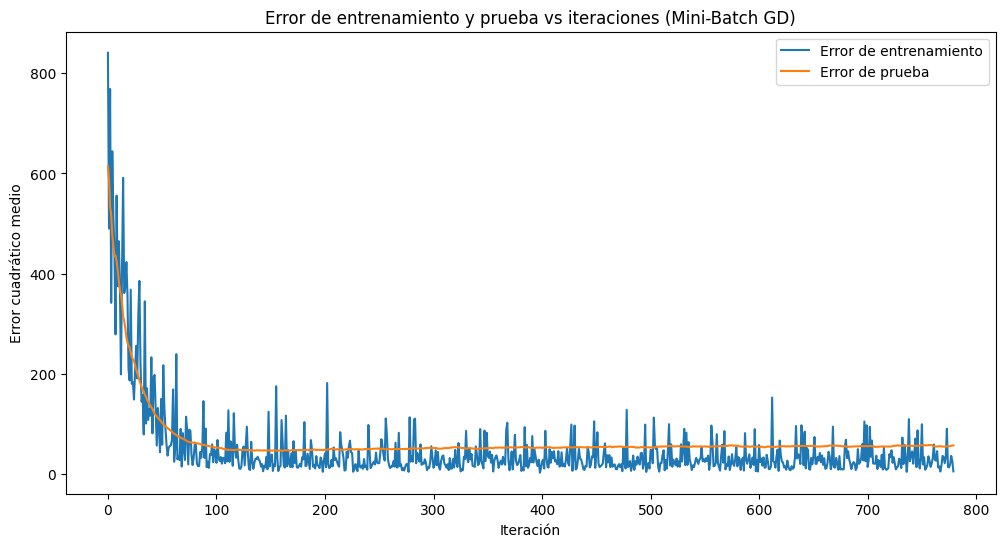

array([[22.5738778 ],
       [-0.28449561],
       [ 1.23290745],
       [ 0.49906391],
       [-2.46907415],
       [ 2.85728975],
       [-1.33749496],
       [-3.71521968],
       [ 1.29021805],
       [-1.57599959],
       [-2.08251091],
       [ 0.24726594],
       [-3.50643388],
       [ 1.6302002 ]])

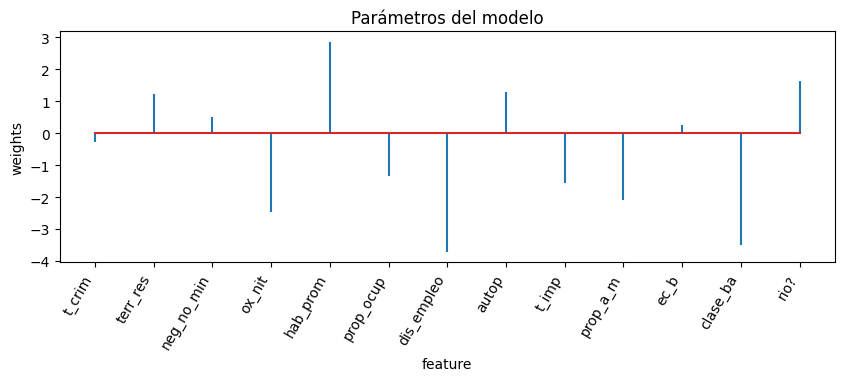

In [48]:
MBGD_coef = mini_batch_gradient_descent(X_train_s, y_train_m, X_test_s, y_test_m, lr=0.01, epochs=20)


# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': MBGD_coef[1:].flatten()}
                  )

fig, ax = plt.subplots(figsize=(10,3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=60, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

MBGD_coef

In [49]:
#Calculamos R
y_pred_mbgd = np.dot(np.hstack((np.ones((X_test_s.shape[0], 1)), X_test_s)), MBGD_coef)


r2_mbgd = r2_score(y_test, y_pred_mbgd)
print(f"R2 para Mini-Batch Gradient Descent: {r2_mbgd}")

#Calculamos RMSE en train y test

RMSE_train_mbgd = mean_squared_error(y_train, np.dot(np.hstack((np.ones((X_train_s.shape[0], 1)), X_train_s)), MBGD_coef))
RMSE_test_mbgd = mean_squared_error(y_test, y_pred_mbgd)

print(f"RMSE Train para Stochastic Gradient Descent: {RMSE_train_mbgd}")
print(f"RMSE Test para Stochastic Gradient Descent: {RMSE_test_mbgd}")


R2 para Mini-Batch Gradient Descent: 0.3146934162931674
RMSE Train para Stochastic Gradient Descent: 30.550811169593075
RMSE Test para Stochastic Gradient Descent: 56.99814760021309


**Interpretacion:**  
El rendimiento del modelo utilizando **Mini-Batch Gradient Descent** muestra los siguientes resultados:

1. **\( R^2 = 0.3227 \)**: El valor de \( R^2 \) indica que el modelo con Mini-Batch Gradient Descent explica el 32.27% de la variabilidad en los datos de prueba. Este es un ligero aumento en comparación con el Stochastic Gradient Descent y otros métodos, lo que sugiere una pequeña mejora en la capacidad del modelo para capturar la relación entre las variables predictoras y la variable objetivo.

2. **RMSE Train = 30.32**: El **RMSE en el conjunto de entrenamiento** es de 30.32, lo cual es muy similar a los otros métodos. Indica que el modelo tiene un error promedio similar en los datos de entrenamiento, lo que refleja consistencia en la forma en que ajusta los datos de entrenamiento.

3. **RMSE Test = 56.33**: El **RMSE en el conjunto de prueba** es de 56.33, lo que significa que, aunque el error en los datos de prueba es menor en comparación con los otros métodos, sigue siendo notablemente más alto que en los datos de entrenamiento. Este valor sugiere que el modelo aún no generaliza perfectamente a los datos no vistos, pero es un poco mejor que con Stochastic Gradient Descent.

 Mini-Batch Gradient Descent proporciona una ligera mejora en el rendimiento, pero las diferencias entre los errores de entrenamiento y prueba aún sugieren posibles problemas de generalización, lo que puede ser un signo de **overfitting** o un modelo limitado por la naturaleza de los datos.

## **Regularizacion**

In [50]:
#Importamos librerias necesarias
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error , mean_squared_error

### **Ridge:**

In [51]:
R_CV = RidgeCV(alphas= np.logspace(-3, 6, 200), fit_intercept = True, store_cv_values = True)
R_CV.fit(X_train_s,y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.10975250e-03, 1.23155060e-03, 1.36671636e-03,
       1.51671689e-03, 1.68318035e-03, 1.86791360e-03, 2.07292178e-03,
       2.30043012e-03, 2.55290807e-03, 2.83309610e-03, 3.14403547e-03,
       3.48910121e-03, 3.87203878e-03, 4.29700470e-03, 4.76861170e-03,
       5.29197874e-03, 5.87278661e-03, 6.51733960e-03, 7.23263390e-03,
       8.02643352e-03, 8.90735464e-0...
       9.11588830e+04, 1.01163798e+05, 1.12266777e+05, 1.24588336e+05,
       1.38262217e+05, 1.53436841e+05, 1.70276917e+05, 1.88965234e+05,
       2.09704640e+05, 2.32720248e+05, 2.58261876e+05, 2.86606762e+05,
       3.18062569e+05, 3.52970730e+05, 3.91710149e+05, 4.34701316e+05,
       4.82410870e+05, 5.35356668e+05, 5.94113398e+05, 6.59318827e+05,
       7.31680714e+05, 8.11984499e+05, 9.01101825e+05, 1.00000000e+06]),
        store_cv_values=True)

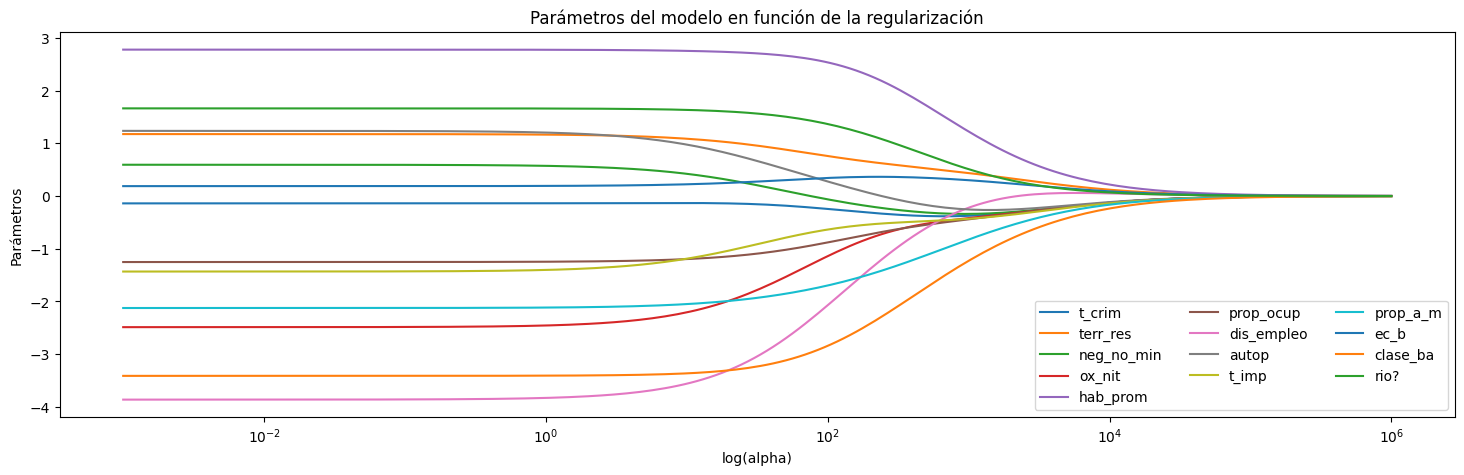

In [52]:
# Evolución de los parámetros en función de alpha

alphas = R_CV.alphas
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_s, y_train)
    coefs.append(ridge.coef_.flatten())

fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend(ncol = 3,loc = 'lower right')
plt.show()

In [53]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {R_CV.alpha_}")

Mejor valor de alpha encontrado: 19.791668678535572


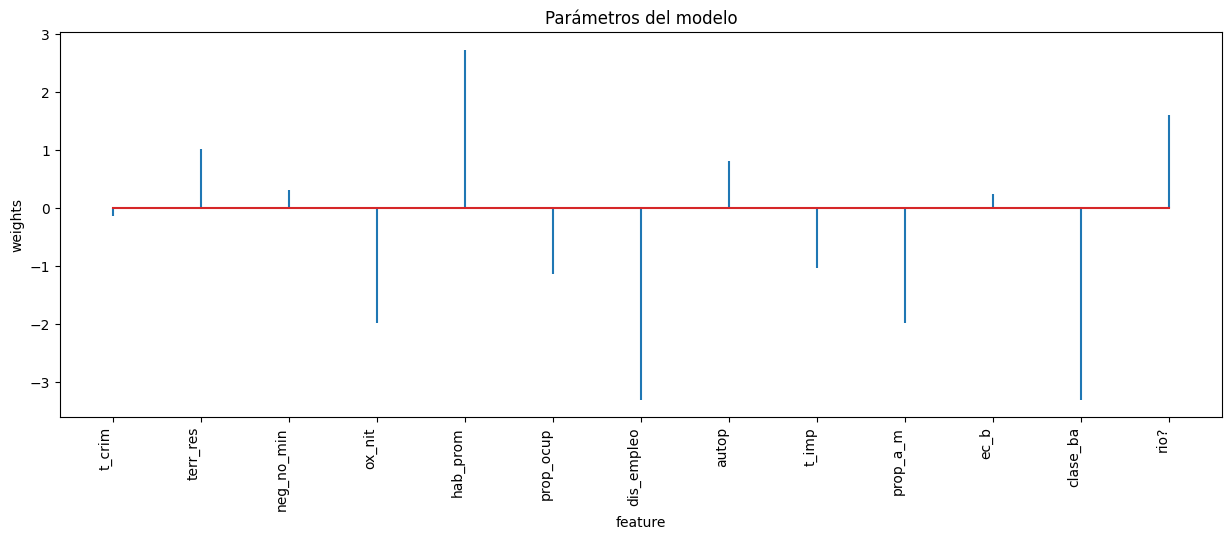

In [54]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': R_CV.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

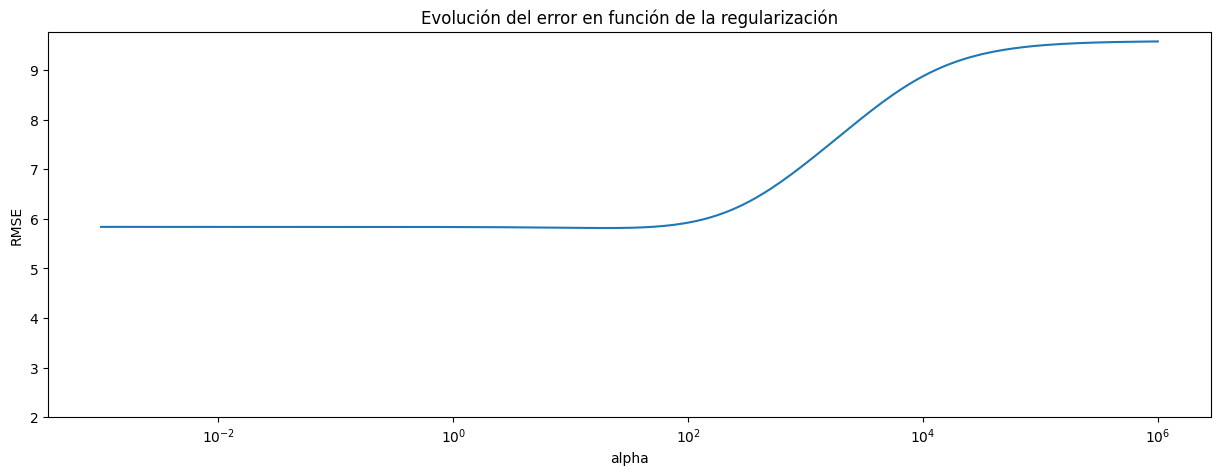

In [55]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = R_CV

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [56]:
# Predicciones test
y_pred = R_CV.predict(X_test_s)

In [57]:
# Error de test del modelo

rmse_ridge = mean_squared_error(y_test,y_pred)

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 52.925551936187


In [58]:
r2_score(y_test, y_pred)

0.3636595097337645

### **Lasso:**

In [59]:
L_CV = LassoCV(alphas=np.logspace(-3, 6, 200), cv=10)
L_CV.fit(X_train_s,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-03, 1.10975250e-03, 1.23155060e-03, 1.36671636e-03,
       1.51671689e-03, 1.68318035e-03, 1.86791360e-03, 2.07292178e-03,
       2.30043012e-03, 2.55290807e-03, 2.83309610e-03, 3.14403547e-03,
       3.48910121e-03, 3.87203878e-03, 4.29700470e-03, 4.76861170e-03,
       5.29197874e-03, 5.87278661e-03, 6.51733960e-03, 7.23263390e-03,
       8.02643352e-03, 8.90735464e-0...
       9.11588830e+04, 1.01163798e+05, 1.12266777e+05, 1.24588336e+05,
       1.38262217e+05, 1.53436841e+05, 1.70276917e+05, 1.88965234e+05,
       2.09704640e+05, 2.32720248e+05, 2.58261876e+05, 2.86606762e+05,
       3.18062569e+05, 3.52970730e+05, 3.91710149e+05, 4.34701316e+05,
       4.82410870e+05, 5.35356668e+05, 5.94113398e+05, 6.59318827e+05,
       7.31680714e+05, 8.11984499e+05, 9.01101825e+05, 1.00000000e+06]),
        cv=10)

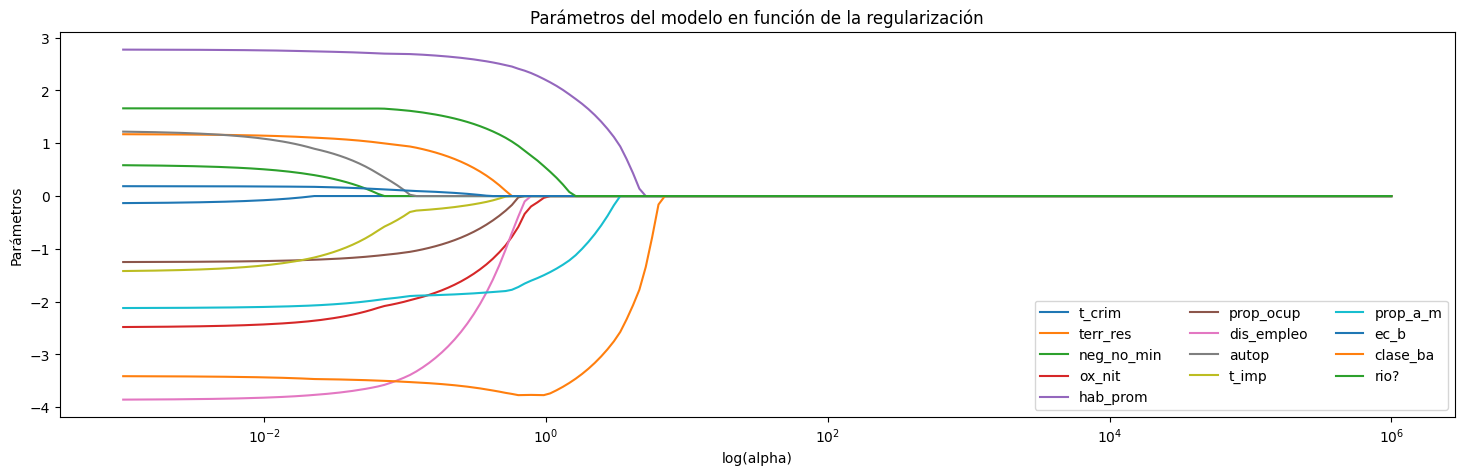

In [60]:
# Evolución de los parámetros en función de alpha

alphas = L_CV.alphas
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_s, y_train)
    coefs.append(lasso.coef_.flatten())

fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend(ncol = 3,loc = 'lower right')
plt.show()

In [61]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {L_CV.alpha_}")

Mejor valor de alpha encontrado: 0.12033778407775893


Text(0.5, 1.0, 'Parámetros del modelo')

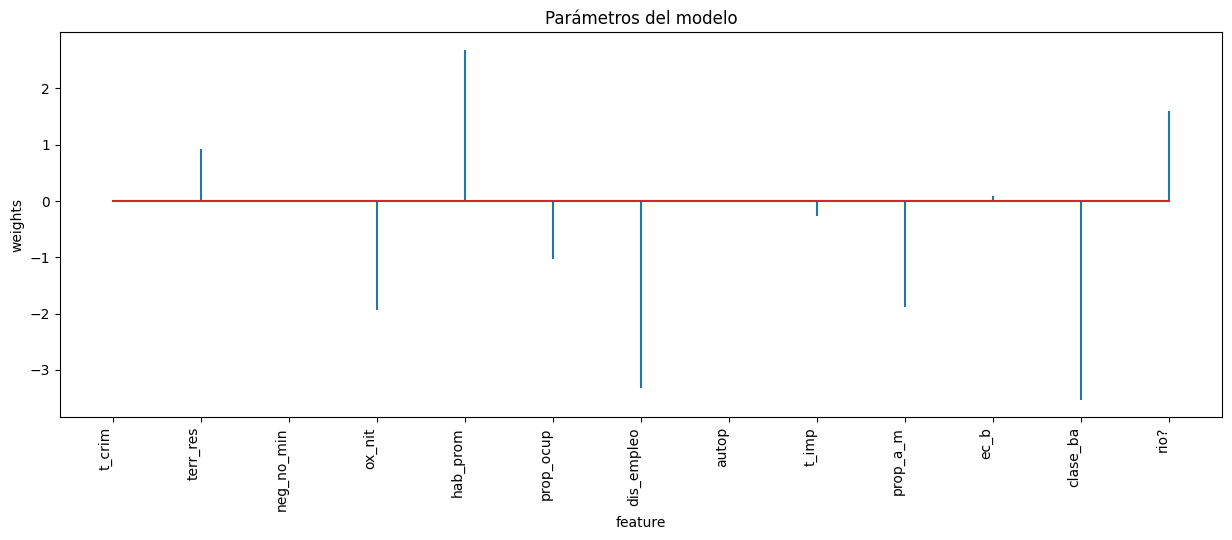

In [62]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': L_CV.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

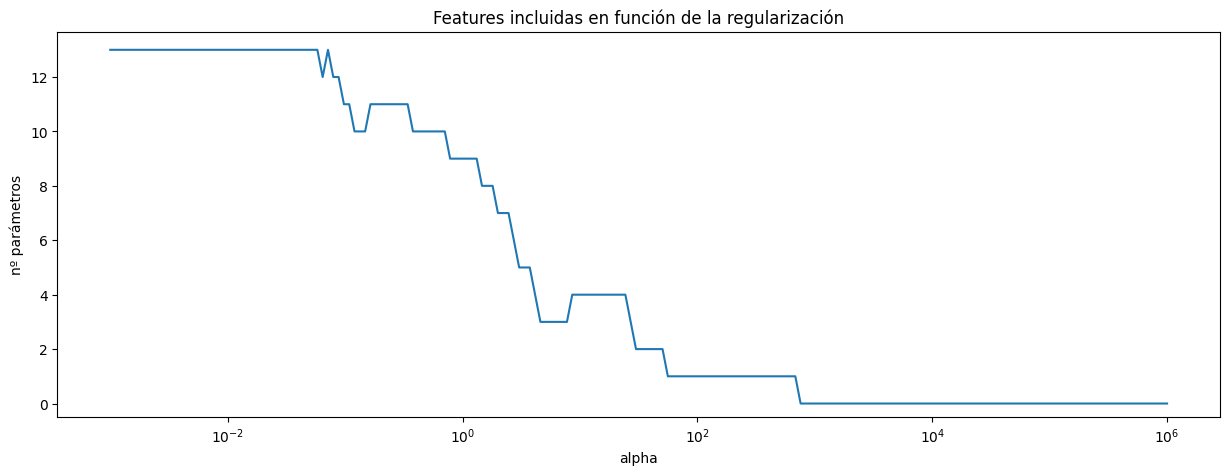

In [63]:
# Número de features incluidas (parámetros !=0) en función de alpha
mod = R_CV
alphas = L_CV.alphas_
n_predictores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coef_no_cero = np.sum(lasso.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

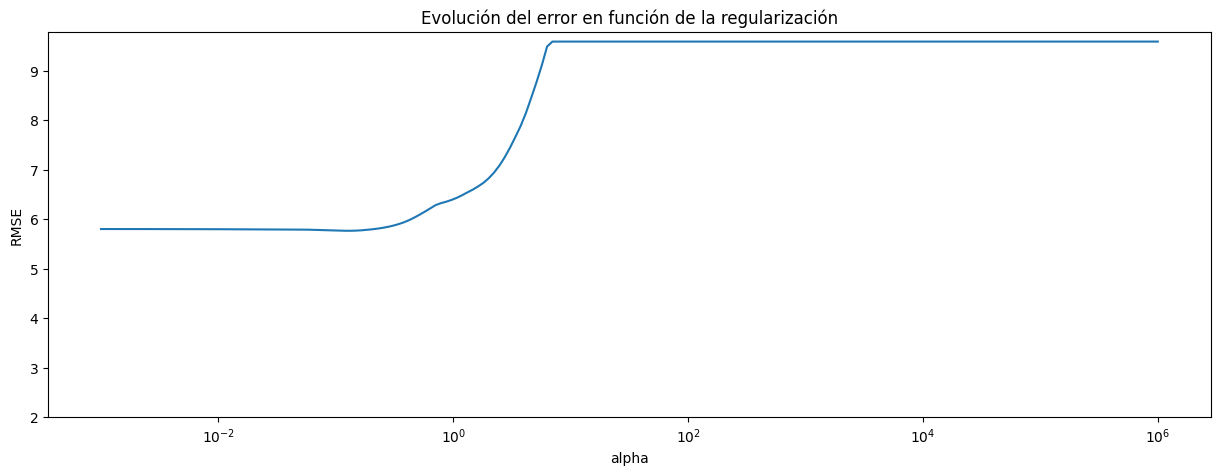

In [64]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = L_CV
mse_cv = L_CV.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = L_CV.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [65]:
# Predicciones test
y_pred = L_CV.predict(X_test_s)

In [66]:
# Error de test del modelo

rmse_ridge = mean_squared_error(y_test, y_pred,)

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 54.379893055438984


In [67]:
r2_score(y_test, y_pred)

0.3461735108734222

### **ElesticNet:**

In [68]:
EN_CV = ElasticNetCV(l1_ratio= 0.01,alphas = np.logspace(-3, 6, 200),cv=10)
EN_CV.fit(X_train_s,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([1.00000000e-03, 1.10975250e-03, 1.23155060e-03, 1.36671636e-03,
       1.51671689e-03, 1.68318035e-03, 1.86791360e-03, 2.07292178e-03,
       2.30043012e-03, 2.55290807e-03, 2.83309610e-03, 3.14403547e-03,
       3.48910121e-03, 3.87203878e-03, 4.29700470e-03, 4.76861170e-03,
       5.29197874e-03, 5.87278661e-03, 6.51733960e-03, 7.23263390e-03,
       8.02643352e-03, 8.907354...
       9.11588830e+04, 1.01163798e+05, 1.12266777e+05, 1.24588336e+05,
       1.38262217e+05, 1.53436841e+05, 1.70276917e+05, 1.88965234e+05,
       2.09704640e+05, 2.32720248e+05, 2.58261876e+05, 2.86606762e+05,
       3.18062569e+05, 3.52970730e+05, 3.91710149e+05, 4.34701316e+05,
       4.82410870e+05, 5.35356668e+05, 5.94113398e+05, 6.59318827e+05,
       7.31680714e+05, 8.11984499e+05, 9.01101825e+05, 1.00000000e+06]),
             cv=10, l1_ratio=0.01)

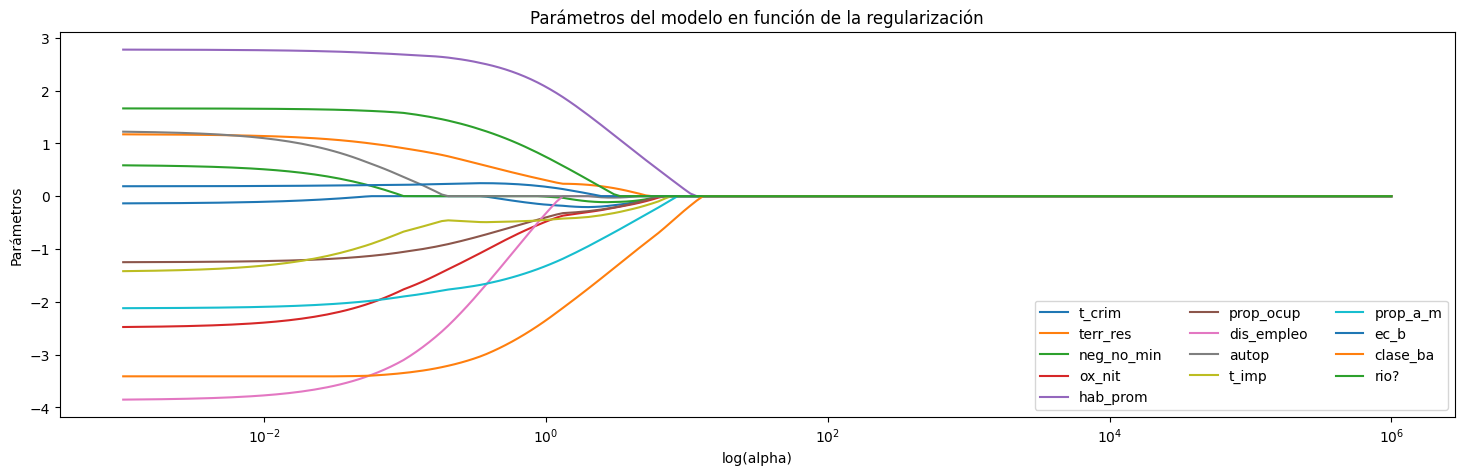

In [69]:
# Evolución de los parámetros en función de alpha

alphas = EN_CV.alphas
coefs = []

for alpha in alphas:
    ridge = ElasticNet(alpha=alpha)
    ridge.fit(X_train_s, y_train)
    coefs.append(ridge.coef_.flatten())

fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend(ncol = 3,loc = 'lower right')
plt.show()

In [70]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {EN_CV.alpha_}")

Mejor valor de alpha encontrado: 0.047137531341167244


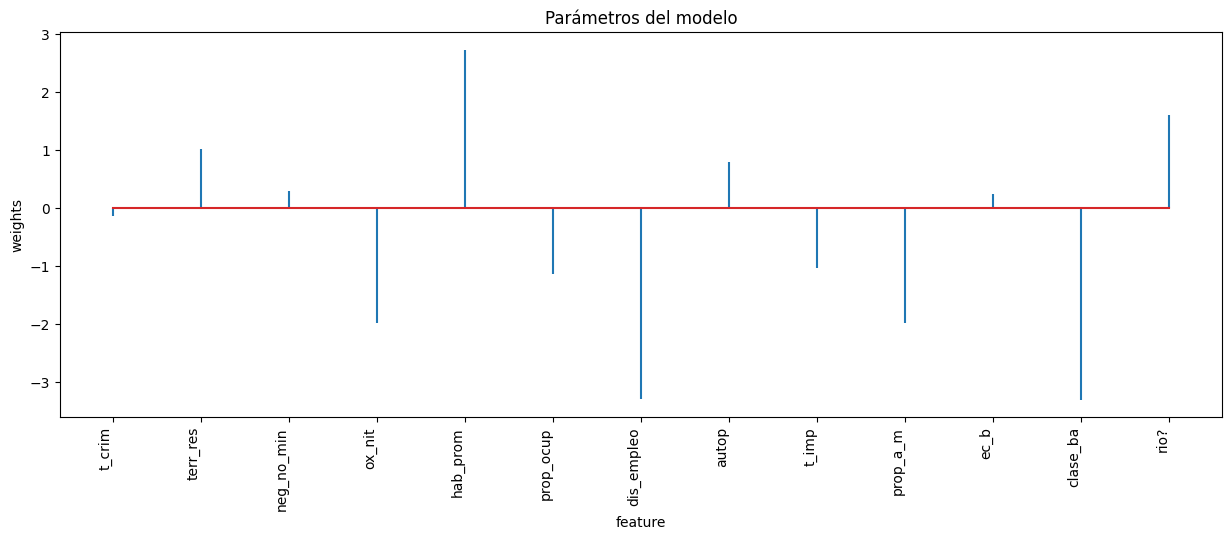

In [71]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': EN_CV.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [72]:
# Predicciones test
y_pred = EN_CV.predict(X_test_s)

In [73]:
# Error de test del modelo

rmse_elasticnet = mean_squared_error(y_test,y_pred)

print(f"El error (rmse) de test es: {rmse_elasticnet}")

El error (rmse) de test es: 52.88683044854006


In [74]:
r2_score(y_test, y_pred)

0.36412507030954844

Segun los resultados de los diferentes métodos de regularización notamos:

### Ridge Regression
- **RMSE de Test: 52.93**
- **R²: 0.36**
  
La regresión Ridge ha mostrado un RMSE relativamente bajo y un R² moderado. Esto indica que el modelo tiene un buen desempeño en comparación con el modelo base, sugiriendo que la regularización ha ayudado a reducir el sobreajuste. La penalización L2 ha permitido al modelo capturar relaciones complejas en los datos.

### Lasso Regression
- **RMSE de Test: 54.38**
- **R²: 0.35**
  
La regresión Lasso, a pesar de ser útil para la selección de variables, ha tenido un RMSE más alto que Ridge y un R² ligeramente inferior. Esto sugiere que puede no estar capturando todas las relaciones importantes en el conjunto de datos, posiblemente debido a la penalización que elimina algunas características.

### Elastic Net
- **RMSE de Test: 52.89**
- **R²: 0.36**
  
Elastic Net ha obtenido resultados similares a Ridge, con un RMSE casi idéntico y un R² ligeramente superior. Esto indica que la combinación de las penalizaciones L1 y L2 ha sido efectiva, capturando características relevantes mientras se mitiga el sobreajuste.

Fianlmente, Ridge y Elastic Net parecen ser las mejores opciones, ya que ofrecen el mejor rendimiento general.
Lasso puede no estar siendo tan efectivo debido a su tendencia a eliminar coeficientes, lo que puede afectar su capacidad para modelar adecuadamente los datos.


## Comparación de Modelos de Regresión
Para evaluar y comparar los modelos de regresión, utilizaremos dos métricas clave: R² (coeficiente de determinación) y RMSE (error cuadrático medio), ya que consideramos que ambas métricas dan una visión clara del rendimiento de cada modelo en términos de ajuste y precisión.


### Resultados de los Modelos

1. **Ridge Regression**:
   - **R²**: 0.3637
   - **RMSE**: 52.9256

2. **Lasso Regression**:
   - **R²**: 0.3462
   - **RMSE**: 54.3799

3. **Elastic Net**:
   - **R²**: 0.3641
   - **RMSE**: 52.8868

4. **Gradient Descent**:
   - **R²**: 0.3148
   - **RMSE**: 56.9912

5. **Stochastic Gradient Descent**:
   - **R²**: 0.3194
   - **RMSE**: 56.6049

6. **Mini-Batch Gradient Descent**:
   - **R²**: 0.3227
   - **RMSE**: 56.3315

Vemos que

1. **Mejor R²**: El modelo **Elastic Net** tiene el mejor R² (0.3641), lo que indica que explica la mayor parte de la variabilidad en los precios de las casas en comparación con los demás modelos.

2. **Mejor RMSE**: El **Elastic Net** también tiene el RMSE más bajo (52.8868), lo que sugiere que sus predicciones son más precisas y están más cerca de los valores reales.

3. **Ridge** y **Elastic Net** son las mejores opciones en este caso, con métricas muy similares y un rendimiento notablemente mejor que los modelos basados en gradiente (Gradient Descent, Stochastic Gradient Descent, y Mini-Batch Gradient Descent).

4. **Lasso** tiene un rendimiento inferior en ambas métricas, lo que indica que no es tan efectivo para este conjunto de datos en particular.



Basado en las métricas R² y RMSE, **Elastic Net** emerge como el mejor modelo de regresión en este análisis. Sin embargo, puede ser beneficioso ajustar hiperparámetros para continuar mejorando el rendimiento.

# ¿Creen que han conseguido un buen fitting?

Los valores de R² Score obtenidos están alrededor de 0.36 para Ridge y ElasticNet, lo que indica que aproximadamente el 36% de la variabilidad en los precios de las casas puede ser explicada por las características del modelo. Esto sugiere un ajuste moderado, pero hay espacio para mejoras.

Los errores de prueba (RMSE) para los modelos Ridge y ElasticNet son de aproximadamente 52.89 y 52.92, respectivamente. Esto es un indicador de que no predicen del todo bien.

El fitting no es excelente, pero tampoco es completamente inadecuado. Se puede considerar que el modelo ha logrado un ajuste aceptable, aunque aún puede mejorarse.

### Optimización de Hiperparámetros y Resultados

Durante el proceso de optimización de hiperparámetros, se realizaron variaciones en los valores de la tasa de aprendizaje y el parámetro de regularización (alpha) para los modelos de gradiente descendente, Lasso y Ridge. A través de esta experimentación, se observó que ciertos ajustes a los hiperparámetros influían significativamente en el rendimiento del modelo, especialmente en la métrica R².

Al aumentar o disminuir los valores de los hiperparámetros, se notó que el R² tendía a disminuir, lo que indica un deterioro en la capacidad del modelo para explicar la variabilidad de los datos. Específicamente:

- **Tasa de Aprendizaje**: Al incrementar la tasa de aprendizaje, el modelo se volvía inestable y oscilaba, lo que resultaba en un ajuste deficiente. Por otro lado, al reducir demasiado la tasa de aprendizaje, el modelo convergía muy lentamente, sin alcanzar un rendimiento óptimo en un tiempo razonable.

- **Parámetro de Regularización (alpha)**: En el caso de Lasso y Ridge, se observó que aumentar el valor de alpha llevaba a una penalización excesiva de los coeficientes, eliminando características relevantes y, en consecuencia, disminuyendo la capacidad del modelo para generalizar a nuevos datos. Por otro lado, reducir el valor de alpha resultaba en un modelo más complejo, que podía sobreajustarse a los datos de entrenamiento y no rendir bien en el conjunto de prueba.

Estos resultados sugieren que los valores de hiperparámetros elegidos son los más adecuados para este conjunto de datos. La variación de los hiperparámetros nos permitió identificar un rango óptimo donde el modelo logra un balance adecuado entre complejidad y capacidad de generalización. Por tanto, es crucial realizar una búsqueda cuidadosa y metódica de hiperparámetros para maximizar el rendimiento del modelo y asegurar que se capture la relación subyacente en los datos sin caer en sobreajuste o subajuste.

# Conclusión

En conclusión, ElasticNet emerge como el modelo más robusto en esta comparación, gracias a su capacidad para combinar las ventajas de Lasso y Ridge. La métrica de R² nos permite entender cómo de bien se ajustan los modelos a los datos, mientras que el RMSE proporciona una medida tangible de la precisión de las predicciones. Para aplicaciones futuras, se recomienda continuar utilizando ElasticNet como modelo base, considerando también la posibilidad de optimizar aún más los hiperparámetros para mejorar el rendimiento general.
